In [91]:
import pandas as pd
import pandas_profiling as pp
import numpy as np

In [3]:
con_belief = pd.read_csv("data/conspiracy_belief_score.csv")

## Pandas Profiling

In [5]:
pp.ProfileReport(con_belief)

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.05s/it]


## Preprocessing

### Creating dummies

In [6]:
con_belief = pd.get_dummies(con_belief, drop_first = True)

In [20]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [9]:
# set our response array
response_var = con_belief.conspiracy_belief_score

# put our predictors in a data frame
predictor_vars = con_belief.drop(columns = "conspiracy_belief_score")

In [12]:
response_var

0       4.333333
1       2.466667
2       3.666667
3       3.933333
4       1.000000
          ...   
2296    3.066667
2297    1.333333
2298    3.800000
2299    1.666667
2300    3.400000
Name: conspiracy_belief_score, Length: 2301, dtype: float64

In [40]:
model = LinearRegression()

In [75]:
model.fit(predictor_vars, response_var)

In [42]:
model.score(predictor_vars, response_var)

0.040043284303887816

In [43]:
model.intercept_

2.3970967575928044

In [44]:
model.coef_

array([ 3.87812859e-02,  7.39820803e-03,  1.05323590e-04,  4.34347163e-01,
        3.32422446e-01,  1.45233709e-01, -5.03516396e-02,  1.10445101e-01,
       -2.09621506e-01,  5.34224823e-03, -2.52485900e-02])

In [45]:
pd.DataFrame(
    {
        "Variable": predictor_vars.columns.values,
        "Coefficient": model.coef_
    }
)

,Variable,Coefficient
0,family_size,0.038781
1,age,0.007398
2,test_time,0.000105
3,education_High school,0.434347
4,education_Less than high school,0.332422
5,education_University degree,0.145234
6,childhood_Suburban,-0.050352
7,"childhood_Urban (town, city)",0.110445
8,gender_Male,-0.209622
9,gender_Other,0.005342


In [73]:
predictor_vars = sm.add_constant(predictor_vars)
model2 = sm.OLS(response_var, predictor_vars).fit()

In [76]:
print(model2.summary())

                               OLS Regression Results                              
Dep. Variable:     conspiracy_belief_score   R-squared:                       0.040
Model:                                 OLS   Adj. R-squared:                  0.035
Method:                      Least Squares   F-statistic:                     8.680
Date:                     Thu, 09 Feb 2023   Prob (F-statistic):           3.09e-15
Time:                             13:56:25   Log-Likelihood:                -3293.1
No. Observations:                     2301   AIC:                             6610.
Df Residuals:                         2289   BIC:                             6679.
Df Model:                               11                                         
Covariance Type:                 nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

## Logistic Regression

In [102]:
loans = pd.read_csv("data/loans.csv")

In [103]:
pp.ProfileReport(loans)

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]


In [104]:
loans_clean = (
    loans
    .query('loan_status != "Current"')
    .copy()
)

loans_clean.head()

,loan_amnt,term,int_rate,grade,home_ownership,annual_inc,purpose,loan_status
0,5000.0,36 months,10.65,B,RENT,24000.0,credit_card,Fully Paid
1,2500.0,60 months,15.27,C,RENT,30000.0,car,Charged Off
2,2400.0,36 months,15.96,C,RENT,12252.0,small_business,Fully Paid
3,10000.0,36 months,13.49,C,RENT,49200.0,other,Fully Paid
5,5000.0,36 months,7.90,A,RENT,36000.0,wedding,Fully Paid


In [105]:
loans_clean.isna().sum()

loan_amnt         5
term              5
int_rate          5
grade             0
home_ownership    5
annual_inc        9
purpose           5
loan_status       5
dtype: int64

In [106]:
loans_clean.dropna(inplace=True)

In [107]:
loans_clean.isna().sum()

loan_amnt         0
term              0
int_rate          0
grade             0
home_ownership    0
annual_inc        0
purpose           0
loan_status       0
dtype: int64

In [108]:
loans_clean.loc[:, "paid"] = (
    np.where(loans_clean.loan_status == "Fully Paid", 1, 0)
)

loans_clean.head()

,loan_amnt,term,int_rate,grade,home_ownership,annual_inc,purpose,loan_status,paid
0,5000.0,36 months,10.65,B,RENT,24000.0,credit_card,Fully Paid,1
1,2500.0,60 months,15.27,C,RENT,30000.0,car,Charged Off,0
2,2400.0,36 months,15.96,C,RENT,12252.0,small_business,Fully Paid,1
3,10000.0,36 months,13.49,C,RENT,49200.0,other,Fully Paid,1
5,5000.0,36 months,7.90,A,RENT,36000.0,wedding,Fully Paid,1


In [109]:
loans_clean = loans_clean.drop(columns = "loan_status")

In [110]:
loans_clean.head()

,loan_amnt,term,int_rate,grade,home_ownership,annual_inc,purpose,paid
0,5000.0,36 months,10.65,B,RENT,24000.0,credit_card,1
1,2500.0,60 months,15.27,C,RENT,30000.0,car,0
2,2400.0,36 months,15.96,C,RENT,12252.0,small_business,1
3,10000.0,36 months,13.49,C,RENT,49200.0,other,1
5,5000.0,36 months,7.90,A,RENT,36000.0,wedding,1


In [117]:
loans_clean = loans_clean.assign(log_loan_amnt = np.log(loans_clean.loan_amnt + 1),
                                 log_annual_inc = np.log(loans_clean.annual_inc + 1))

loans_clean = pd.get_dummies(loans_clean, drop_first = True)

In [118]:
loans_predictors = loans_clean.drop(columns = "paid")
loans_response = loans_clean.paid

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
loans_pred_train, loans_pred_test, loans_resp_train, loans_resp_test = (
    train_test_split(
        loans_predictors, 
        loans_response, 
        test_size = 0.1, 
        random_state = 7
    )
)

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [123]:
model = LogisticRegression()
model.fit(loans_pred_train, loans_resp_train)

LogisticRegression()

In [132]:
scores = cross_val_score(
    model, loans_pred_train, loans_resp_train, scoring = "roc_auc", cv = 10
)

In [133]:
scores

array([0.69040496, 0.46008904, 0.45481138, 0.46158061, 0.68794   ,
       0.69768567, 0.69581829, 0.46996452, 0.70047341, 0.46775061])

In [134]:
np.mean(scores)

0.5786518478676996

In [136]:
model.score(loans_pred_test, loans_resp_test)

0.7995684488132342

In [139]:
pred_test = model.predict_proba(loans_pred_test)

In [140]:
pred_test

array([[0.19300356, 0.80699644],
       [0.19842132, 0.80157868],
       [0.16451155, 0.83548845],
       ...,
       [0.19941537, 0.80058463],
       [0.22589258, 0.77410742],
       [0.19760565, 0.80239435]])

In [141]:
pred_test = pred_test[:, 1]

In [142]:
pred_test

array([0.80699644, 0.80157868, 0.83548845, ..., 0.80058463, 0.77410742,
       0.80239435])

In [143]:
from sklearn.metrics import roc_auc_score

In [145]:
roc_auc_score(y_true = loans_resp_test, y_score = pred_test)

0.44593713908595944

## Random Forests

In [146]:
from sklearn.ensemble import RandomForestClassifier

In [147]:
model = RandomForestClassifier(n_estimators = 100)

model.fit(loans_pred_train, loans_resp_train)

RandomForestClassifier()

In [156]:
scores = cross_val_score(
    model, loans_pred_train, loans_resp_train, scoring = "accuracy", cv = 10
)

In [151]:
scores

array([0.87794232, 0.88091911, 0.88069146, 0.87647791, 0.87707848,
       0.88211509, 0.88323771, 0.88019863, 0.8796023 , 0.87869362])

In [152]:
np.mean(scores)

0.8796956639623612

In [153]:
model.score(loans_pred_train, loans_resp_train)

0.9988809847334346

In [155]:
model.score(loans_pred_test, loans_resp_test)

0.7945336849676337

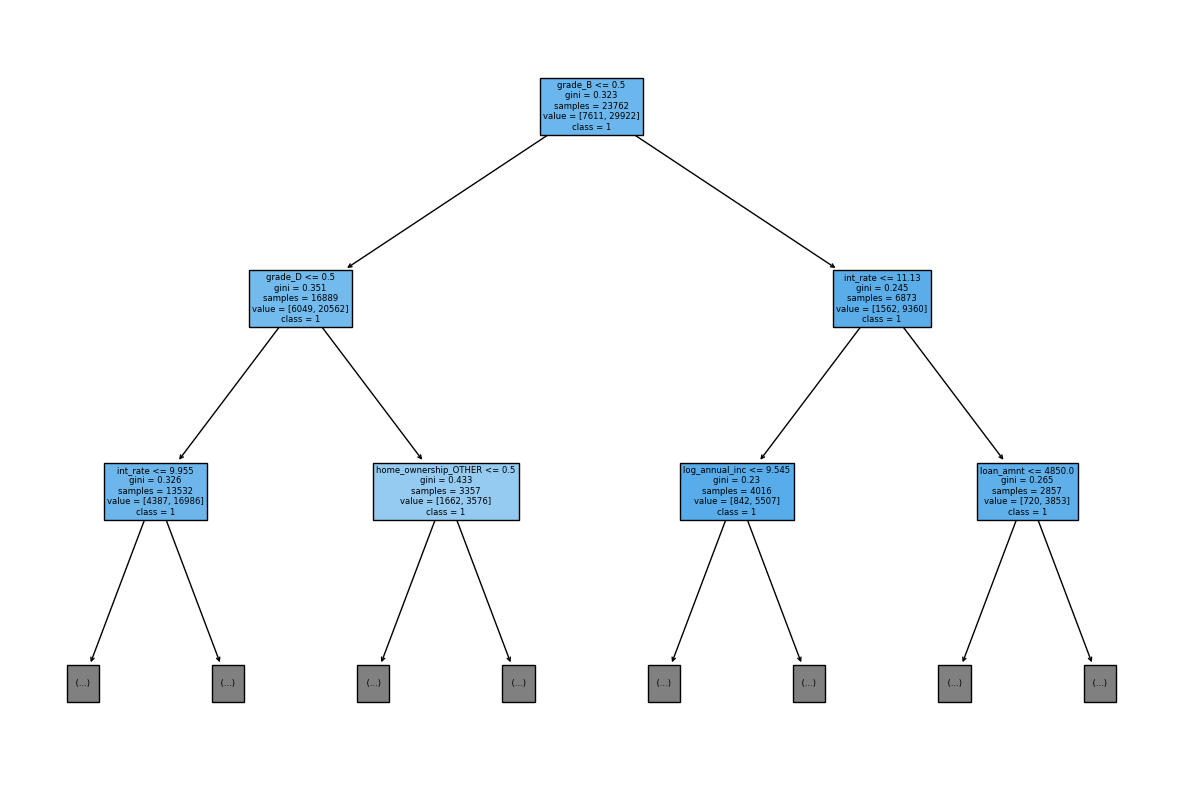

In [159]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# create a list with names of predictors, and an array with target categories for plotting
loans_pred_names = list(loans_pred_test)
loans_resp_names = ['0', '1']

# set the figure size
fig = plt.figure(figsize=(15, 10))

# plot the decision tree
plot_tree(model.estimators_[0], # Pull out one tree from the forest
          max_depth = 2, # will freeze if we try plot all of it!
          feature_names = loans_pred_names,
          class_names = loans_resp_names, 
          filled=True);

In [160]:
# Get numerical feature importances
importances = list(model.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(loans_pred_names, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:40} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: int_rate                                 Importance: 0.22
Variable: annual_inc                               Importance: 0.17
Variable: log_annual_inc                           Importance: 0.17
Variable: loan_amnt                                Importance: 0.13
Variable: log_loan_amnt                            Importance: 0.13
Variable: term_60 months                           Importance: 0.02
Variable: home_ownership_RENT                      Importance: 0.02
Variable: grade_B                                  Importance: 0.01
Variable: grade_C                                  Importance: 0.01
Variable: grade_D                                  Importance: 0.01
Variable: grade_E                                  Importance: 0.01
Variable: grade_F                                  Importance: 0.01
Variable: grade_G                                  Importance: 0.01
Variable: home_ownership_OWN                       Importance: 0.01
Variable: purpose_credit_card                   